# Stock Exploratiry Data Analysis

1. Loading stocks
2. Calculation of indicators
3. Dealing with missing data


In [3]:
import pathlib
import sys
import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [4]:
logger = logging.getLogger(__name__)
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO, stream=sys.stdout)

In [5]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

#### Global variables

In [6]:
DATA_DIR = os.getenv('DATA_DIR', os.path.join(os.getcwd(), r'data'))

In [7]:
HISTORICAL_PRICES_5_YRS = os.path.join(DATA_DIR, 'prices_5yrs.csv')
HISTORICAL_PRICES_10_YRS = os.path.join(DATA_DIR, 'prices_10yrs.csv')
tickers = ['AAPL','MSFT','AMZN','GOOG','FB','WMT','JPM','TSLA','NFLX','ADBE']

In [8]:
df_prices = pd.read_csv(HISTORICAL_PRICES_10_YRS, parse_dates=['date'], index_col=0)

In [10]:
# df_prices.loc[:, ['close']]

### Pre-processing

##### Loading prices

In [11]:
all_tickers = df_prices.ticker.unique().tolist()
all_tickers

['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'WMT', 'JPM', 'TSLA', 'NFLX', 'ADBE']

In [17]:
df_nan = df_prices[df_prices['close'].isna().T]
df_nan

,ticker,open,high,low,close,volume
date,,,,,,


In [ ]:
df_without_na = df_prices.drop('close', axis=1).dropna(axis=0)

#### Adding Returns

We calculate the annual average return and volatility for each company by obtaining their adjusted closing prices,  which is then annualized (assuming 252 market days per year).

In [22]:
df_prices['pct_change'] = df_prices['close'].pct_change()
df_prices['simple_return'] = df_prices['close'].pct_change()
df_prices['shifted_return'] = df_prices['close']/ df_prices['close'].shift(1)
df_prices['log_return'] = np.log(df_prices['close']/df_prices['close'].shift(1))
df_prices['annualised_return'] = df_prices['close'].pct_change().mean() * 252
df_prices['volatility'] = df_prices['close'].pct_change().std() * sqrt(252)

In [23]:
df_prices.head(5)

,ticker,open,high,low,close,volume,pct_change,simple_return,shifted_return,log_return,annualised_return,volatility
date,,,,,,,,,,,,
2011-04-26,AAPL,10.878406,10.920551,10.747048,10.779964,338800000,NaN,NaN,NaN,NaN,0.241414,0.436884
2011-04-27,AAPL,10.835953,10.839337,10.677832,10.771658,356213200,-0.000771,-0.000771,0.999229,-0.000771,0.241414,0.436884
2011-04-28,AAPL,10.649837,10.759352,10.629226,10.667065,360959200,-0.009710,-0.009710,0.990290,-0.009757,0.241414,0.436884
2011-04-29,AAPL,10.667987,10.888558,10.664603,10.771044,1006345200,0.009748,0.009748,1.009748,0.009700,0.241414,0.436884
2011-05-02,AAPL,10.759046,10.781503,10.628611,10.652606,442713600,-0.010996,-0.010996,0.989004,-0.011057,0.241414,0.436884


#### Resample daily to monthly

In [24]:
df = df_prices.resample("M").last()

/var/folders/zn/8l1qxk_s2z12z2dtb7lgbsdm0000gn/T/ipykernel_11717/3200814701.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df_prices.resample("M").last()


In [25]:
df.head()

,ticker,open,high,low,close,volume,pct_change,simple_return,shifted_return,log_return,annualised_return,volatility
date,,,,,,,,,,,,
2011-04-30,ADBE,34.049999,34.119999,33.470001,33.549999,5228700,-0.013815,-0.013815,0.986185,-0.013912,0.241414,0.436884
2011-05-31,ADBE,34.610001,34.840000,34.410000,34.630001,3938000,0.009915,0.009915,1.009915,0.009867,0.241414,0.436884
2011-06-30,ADBE,31.209999,31.600000,31.049999,31.450001,5519700,0.009631,0.009631,1.009631,0.009585,0.241414,0.436884
2011-07-31,ADBE,28.000000,28.150000,27.629999,27.709999,8024200,-0.011064,-0.011064,0.988936,-0.011125,0.241414,0.436884
2011-08-31,ADBE,25.350000,25.870001,25.040001,25.240000,5257300,0.001985,0.001985,1.001985,0.001983,0.241414,0.436884


#### Pivoting prices

In [27]:
df_prices.reset_index(inplace=True)
df_prices = df_prices.pivot(index='date', columns='ticker', values='close')

In [28]:
# print(tabulate(df_prices.head(5), headers="keys"))
df_prices.head()

ticker,AAPL,ADBE,AMZN,FB,GOOG,JPM,MSFT,NFLX,TSLA,WMT
date,,,,,,,,,,
2011-04-26,10.779964,33.130001,182.300003,NaN,265.415161,34.138664,20.897825,32.701427,5.386,42.440784
2011-04-27,10.771658,33.650002,196.630005,NaN,267.875946,34.426182,21.049429,33.708572,5.416,42.842289
2011-04-28,10.667065,34.020000,195.070007,NaN,267.980530,34.690983,21.312746,33.481430,5.532,43.054844
2011-04-29,10.771044,33.549999,195.809998,NaN,271.034088,34.524529,20.682383,33.238571,5.520,43.283154
2011-05-02,10.652606,33.549999,201.190002,NaN,268.274445,34.184052,20.474920,33.884285,5.490,43.330376


<AxesSubplot:xlabel='date'>

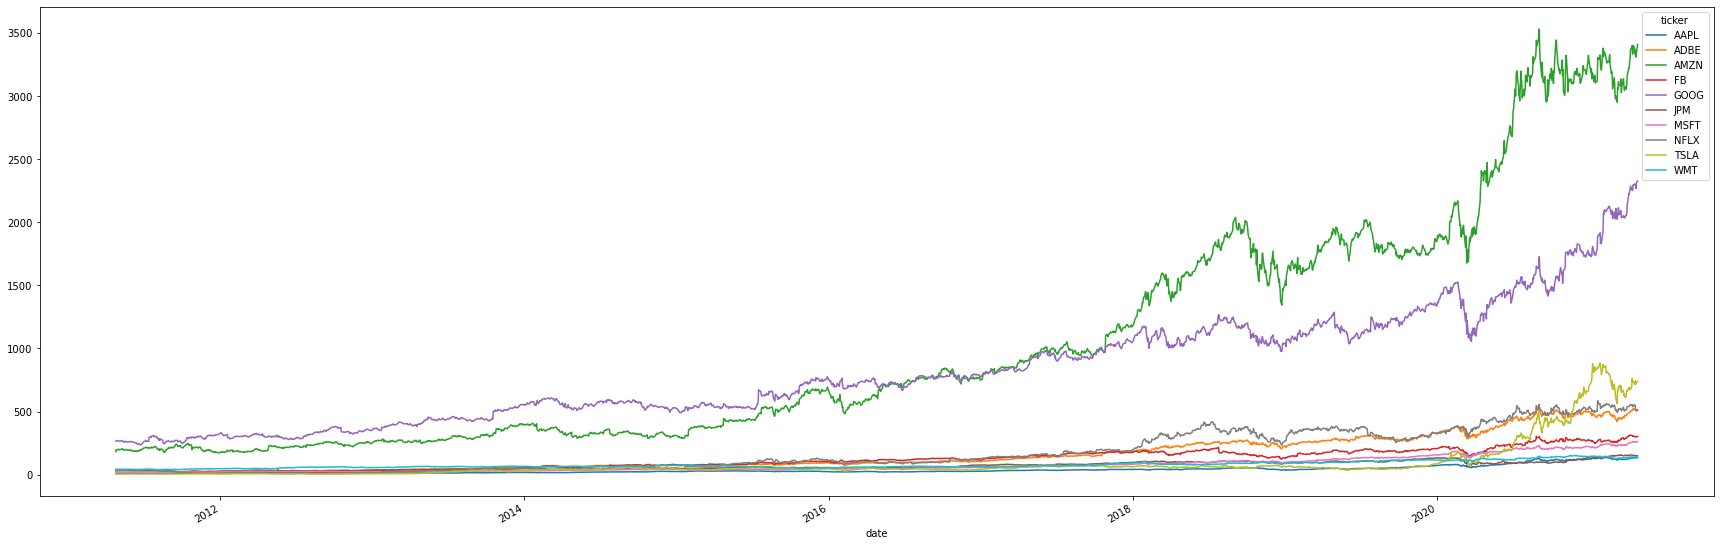

In [29]:
df_prices.plot(figsize=(30, 10))

#### Normalizing result to start with the same prices


In [31]:
df_normalized_prices = (df_prices / df_prices.iloc[0])

<AxesSubplot:xlabel='date'>

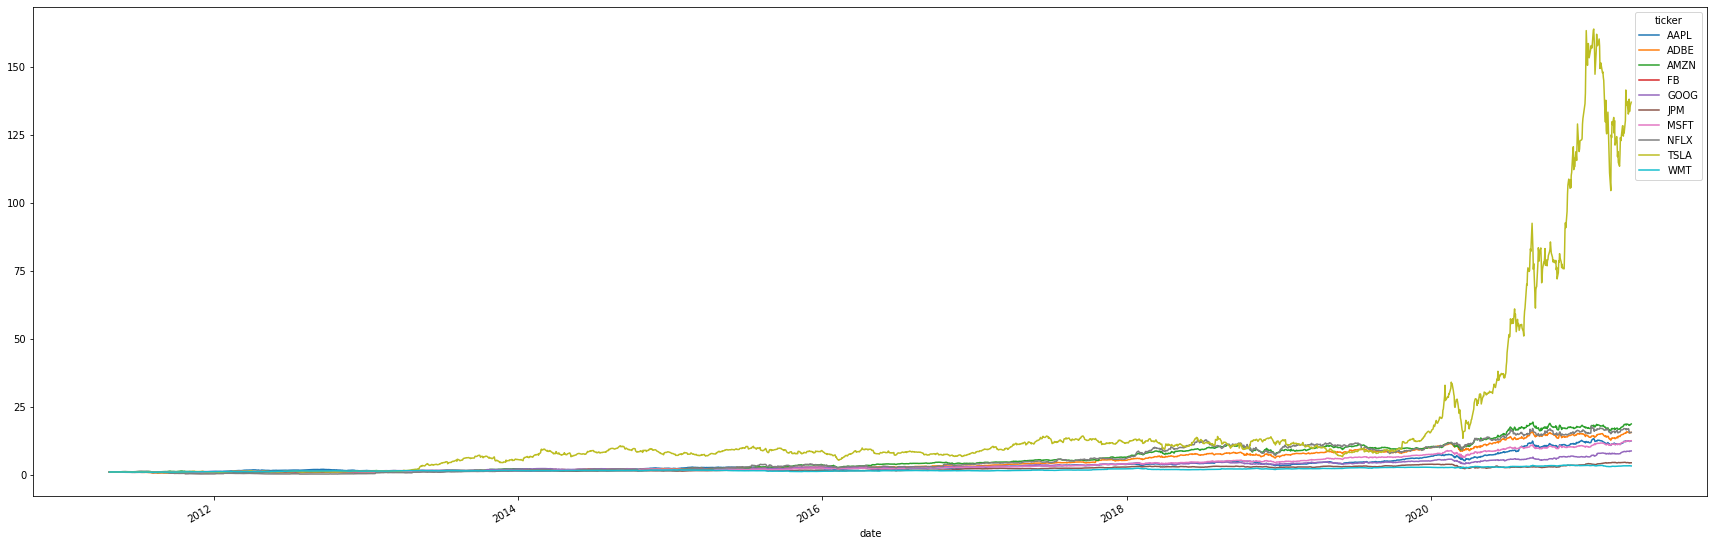

In [32]:
df_normalized_prices.plot(figsize=(30, 10))

#### Calculate log return 

In [33]:
df_return = np.log(1 + df_prices.pct_change())

In [38]:
# print(tabulate(df_return[1:5], headers="keys"))
df_return.head()

ticker,AAPL,ADBE,AMZN,FB,GOOG,JPM,MSFT,NFLX,TSLA,WMT
date,,,,,,,,,,
2011-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-27,-0.000771,0.015574,0.075670,NaN,0.009229,0.008387,0.007228,0.030333,0.005554,0.009416
2011-04-28,-0.009757,0.010935,-0.007965,NaN,0.000390,0.007662,0.012432,-0.006761,0.021192,0.004949
2011-04-29,0.009700,-0.013912,0.003786,NaN,0.011330,-0.004810,-0.030023,-0.007280,-0.002172,0.005289
2011-05-02,-0.011057,0.000000,0.027105,NaN,-0.010234,-0.009911,-0.010082,0.019240,-0.005450,0.001090


<AxesSubplot:xlabel='date'>

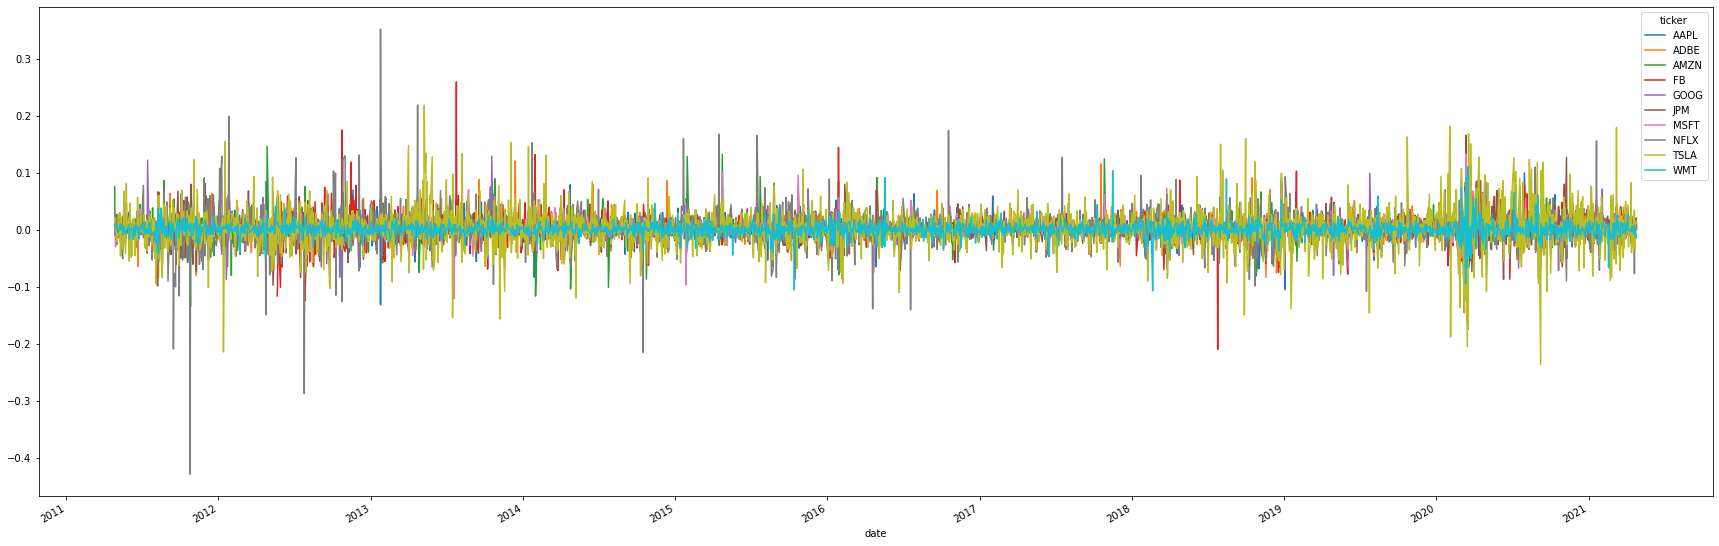

In [39]:
df_return.plot(figsize=(30, 10))

<AxesSubplot:xlabel='date'>

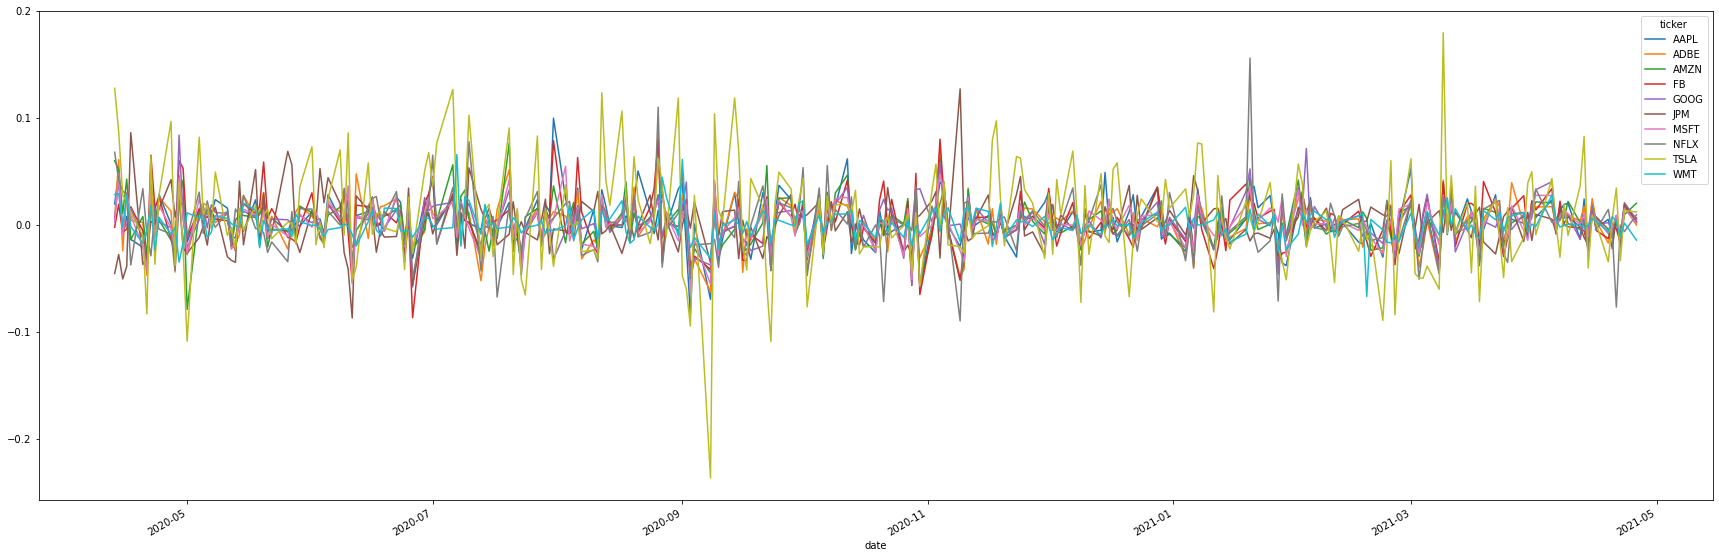

In [40]:
df_return[df_return.index > '2020-04-11'].plot(figsize=(30, 10))

#### Assets correlation
Return correlation between assets using 5 years of returns. The lower the better to find opportunities for diversification.

In [25]:
df_corr = df_return.corr()
df_corr.style.background_gradient(cmap='coolwarm').set_precision(4).set_properties(**{'font-size': '12pt'})

ticker,AAPL,ADBE,AMZN,FB,GOOG,JPM,MSFT,NFLX,TSLA,WMT
ticker,,,,,,,,,,
AAPL,1.0000,0.6460,0.6176,0.5961,0.6549,0.4418,0.7154,0.4645,0.4136,0.3518
ADBE,0.6460,1.0000,0.6770,0.6162,0.7020,0.3898,0.8062,0.5679,0.4197,0.3440
AMZN,0.6176,0.6770,1.0000,0.6213,0.6702,0.2697,0.7076,0.5975,0.3797,0.2916
FB,0.5961,0.6162,0.6213,1.0000,0.6838,0.3548,0.6362,0.4691,0.3350,0.2411
GOOG,0.6549,0.7020,0.6702,0.6838,1.0000,0.4830,0.7812,0.5186,0.3711,0.3168
JPM,0.4418,0.3898,0.2697,0.3548,0.4830,1.0000,0.5020,0.2133,0.2544,0.2588
MSFT,0.7154,0.8062,0.7076,0.6362,0.7812,0.5020,1.0000,0.5390,0.4226,0.4007
NFLX,0.4645,0.5679,0.5975,0.4691,0.5186,0.2133,0.5390,1.0000,0.3352,0.2556
TSLA,0.4136,0.4197,0.3797,0.3350,0.3711,0.2544,0.4226,0.3352,1.0000,0.1630
